In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
iris = datasets.load_iris()
X = iris.data
print(X)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [3]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X = X[y != 0, :2]
y = y[y != 0]

In [5]:
n_sample = len(X)

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

In [8]:
# X_train = X[:int(.9 * n_sample)]
# y_train = y[:int(.9 * n_sample)]
# X_test = X[int(.9 * n_sample):]
# y_test = y[int(.9 * n_sample):]

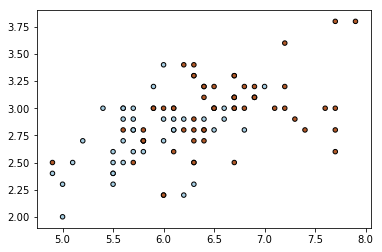

In [9]:
#SVM Model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
#Scatter plot data
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
plt.show()

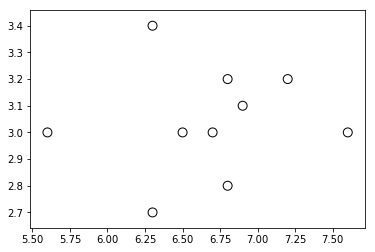

In [10]:
# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')
plt.show()

In [11]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

In [12]:
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step=0.01), np.arange(y_min, y_max, step=0.01))
x_grid.shape

(180, 300)

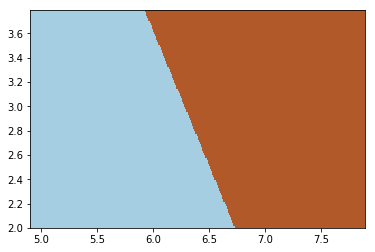

In [13]:
#decision_function returns distance of the samples X to the separating hyperplane
Z = classifier.decision_function(np.array([x_grid.ravel(), y_grid.ravel()]).T)

# Put the result into a color plot
Z = Z.reshape(x_grid.shape)
plt.pcolormesh(x_grid, y_grid, Z > 0, cmap=plt.cm.Paired)
plt.show()

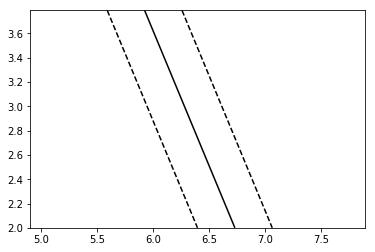

In [14]:
plt.contour(x_grid, y_grid, Z, colors=['k', 'k', 'k'],
               linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])

plt.show()

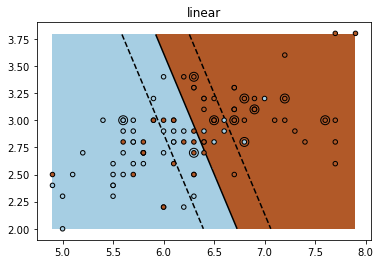

In [15]:
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')
plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step=0.01), np.arange(y_min, y_max, step=0.01))
Z = classifier.decision_function(np.array([x_grid.ravel(), y_grid.ravel()]).T)

# Put the result into a color plot
Z = Z.reshape(x_grid.shape)
plt.pcolormesh(x_grid, y_grid, Z > 0, cmap=plt.cm.Paired)
plt.contour(x_grid, y_grid, Z, colors=['k', 'k', 'k'],
               linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])

plt.title('linear')
plt.show()